This script is for creating a visualization of D-SYNTH data with different lesion sizes.

Make sure to run: ```python download_scripts/download_data.py --all``` from ```code/``` directory before running this script.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd())) # add upper code/ directory to path 
from custom_datasets import DbtSynthDataset
import config_global

In [2]:
def remove_ticks_and_axes(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

In [3]:
"""Function for drawing bbox on an image shown in ax"""
def draw_box(ax, box, color='r', text_label=None, linewidth=1.5):
    x1, y1, x2, y2 = box
    ax.plot([x1, x2], [y1, y1], color=color, linewidth=linewidth)
    ax.plot([x1, x2], [y2, y2], color=color, linewidth=linewidth)
    ax.plot([x1, x1], [y1, y2], color=color, linewidth=linewidth)
    ax.plot([x2, x2], [y1, y2], color=color, linewidth=linewidth)

    if text_label is not None:
        ax.text(x2, y1, text_label, color='r', ha='right', va='bottom', fontsize=12)

In [4]:
# Create DBT synth dataset. Descriptions for all arguments can be found in the Dataset definition in custom_datasets.py
ds_cview = DbtSynthDataset(
        root_dir=config_global.dir_global + '/data/cview/output_cview_det_Victre',
        lesion_densities=['1.1'],
        breast_densities=['fatty'],
        lesion_sizes=['5.0', '7.0', '9.0'],
        lesion_only=True,
        return_mask=True,
        image_mode='cview')

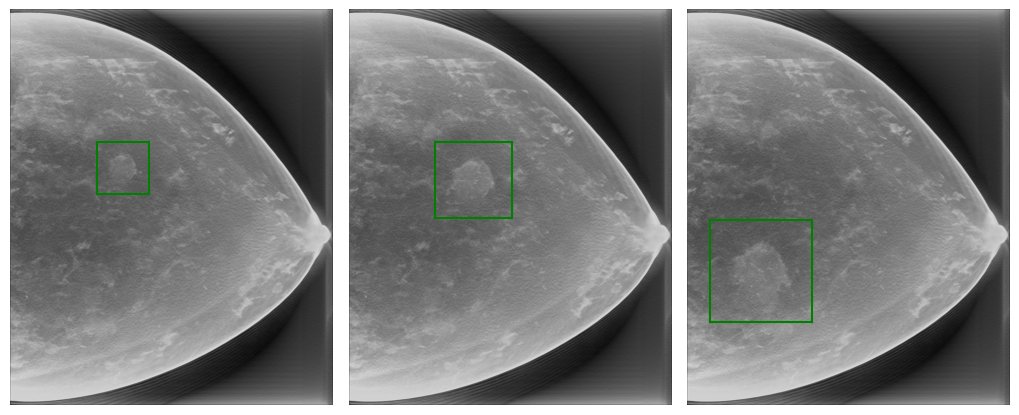

In [5]:
dbt_nums = [6, 6, 6]
fig, ax = plt.subplots(1,3, figsize=(10, 30))
for row_ax, ls, dbt_num in zip(ax, ['5.0', '7.0', '9.0'], dbt_nums):
    # get cview
    idx = ds_cview.label_df[ds_cview.label_df['lesion_size']==ls].index[dbt_num]
    image, target = ds_cview[idx]
    row_ax.imshow(image.squeeze(), cmap='gray')
    # print(ds_cview.label_df['raw_path'][idx])
    box = target['boxes'][0]
    draw_box(row_ax, box, color='g')

    remove_ticks_and_axes(row_ax)

plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0.05, hspace=0.05)  # ensures no gaps